In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the Dataset
url = '/content/crx.csv'
df = pd.read_csv(url, header=None)

In [3]:
# Assign column names if not present
column_names = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
    'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Target'
]
df.columns = column_names

In [4]:
# Display the first few rows
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [5]:
# Step 2: Exploratory Data Analysis (EDA)
df.info()
missing_values = df.isnull().sum()
description = df.describe()
print("Missing Values:\n", missing_values)
print("\nDescription:\n", description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
Missing Values:
 A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13 

In [6]:
# Step 3: Data Preprocessing

# Handling missing values
# Assuming '?' is used for missing values in this dataset
df.replace('?', pd.NA, inplace=True)

# Impute numerical missing values with mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Impute categorical missing values with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
# Encode target column: '+' -> 1, '-' -> 0
df['Target'] = df['Target'].apply(lambda x: 1 if x == '+' else 0)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Target':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [8]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f'Training Set: {X_train.shape}, {y_train.shape}')
print(f'Test Set: {X_test.shape}, {y_test.shape}')

Training Set: (552, 15), (552,)
Test Set: (138, 15), (138,)


In [9]:
# Step 5: Model Training and Evaluation

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

    # Output results
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')


Decision Tree Results:
Accuracy: 0.77
Precision: 0.82
Recall: 0.70
F1 Score: 0.75
Confusion Matrix:
[[57 11]
 [21 49]]

Random Forest Results:
Accuracy: 0.86
Precision: 0.90
Recall: 0.81
F1 Score: 0.86
Confusion Matrix:
[[62  6]
 [13 57]]

Support Vector Machine Results:
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.83
Confusion Matrix:
[[57 11]
 [12 58]]

Logistic Regression Results:
Accuracy: 0.83
Precision: 0.82
Recall: 0.84
F1 Score: 0.83
Confusion Matrix:
[[55 13]
 [11 59]]


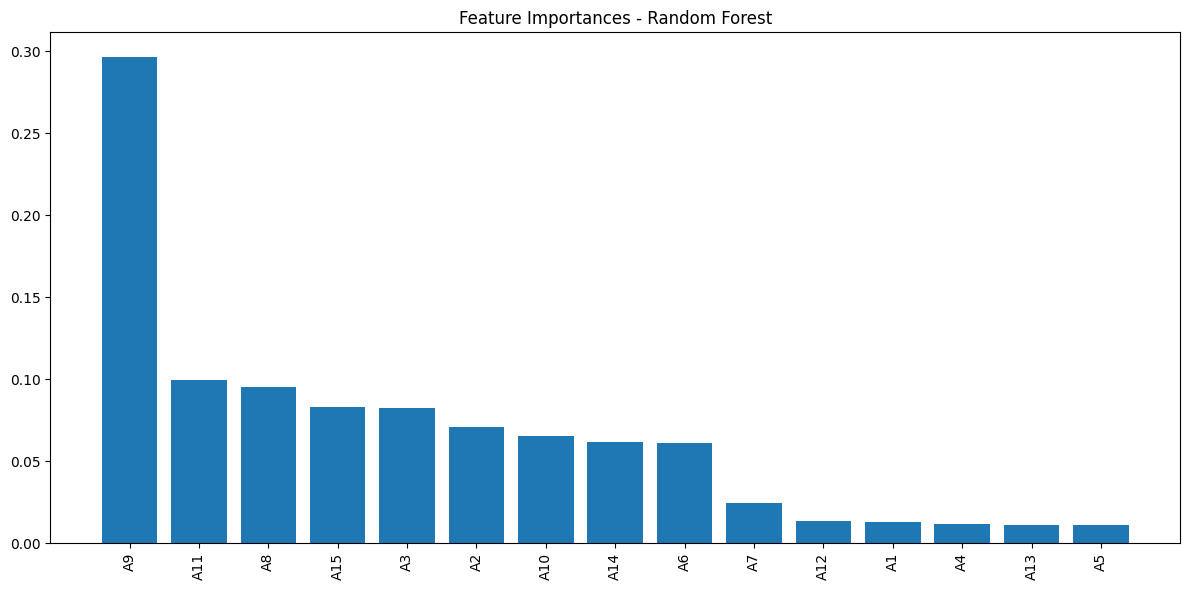

In [10]:
# Step 6: Visualization and Interpretation

# Feature Importance Plot for Random Forest
if 'Random Forest' in results:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    indices = importances.argsort()[::-1]
    feature_names = X.columns

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances - Random Forest")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()


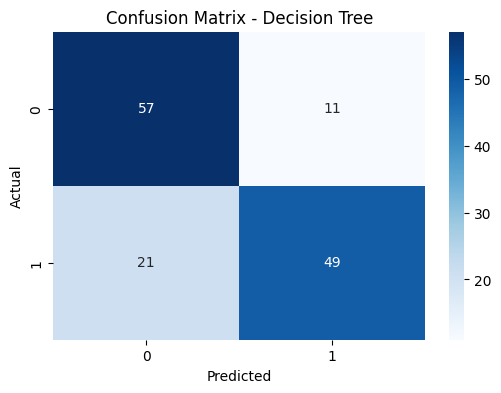

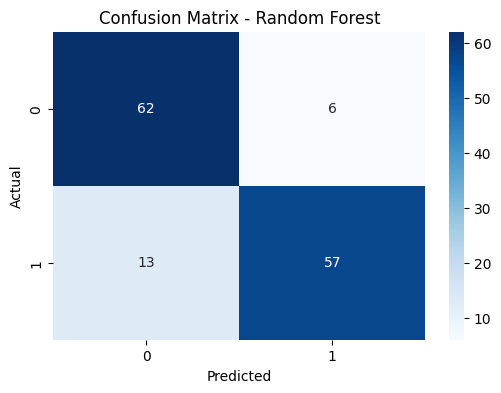

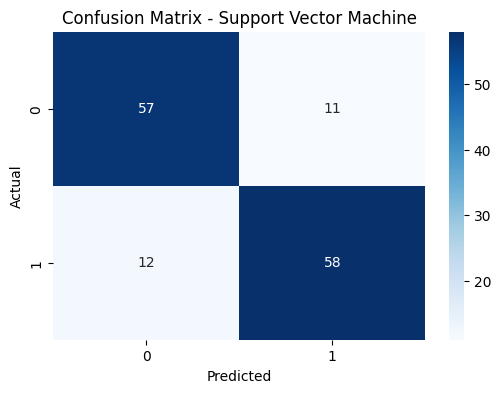

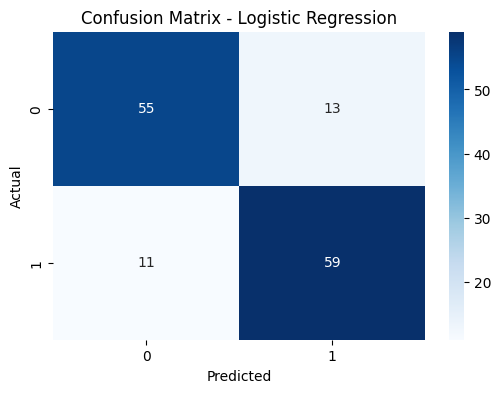

In [11]:
# Confusion Matrices
for model_name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [12]:
# Step 7: Deployment and Automation

# Best Model Selection
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {results[best_model_name]['Accuracy']:.2f}")

The best model is: Random Forest with an accuracy of 0.86
